# 1. Data Presentation


### Import essential libraries:

- for data manipulation and visualization: Numpy, Pandas, Seaborn, matplotlib

- for preprocessing and handling data imbalance: sklearn.preprocessing, sklearn.impute, imblearn.under_sampling

- for text processing: sklearn.feature_extraction.text

- for model building and evaluation: sklearn.model_selection, sklearn.metrics

- Machine learning models: sklearn.linear_model, sklearn.esemble, sklearn.svm, sklearn.neighbors, sklearn.naive_bayes

- Gradient boosting models: xgboost, lightgbm

- for building pipelines and transformations: sklearn.pipeline, sklearn.compose

- for statistical tests: scipy.stats

- Miscellaneous: warnings

In [40]:
# === Core packages ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Data preprocessing ===
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# === Data splitting and evaluation ===
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV, cross_val_score
)
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    balanced_accuracy_score, matthews_corrcoef,
    classification_report, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay, make_scorer, 
    ConfusionMatrixDisplay, classification_report,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
)

# === Models ===
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    StackingClassifier
)
from sklearn.feature_selection import RFE

# === Optional (class imbalance & optimization) ===
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint, uniform, chi2_contingency

# === Utilities ===
import warnings
warnings.filterwarnings('ignore')

# Plot settings
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

### Loading the dataset

In [2]:
df = pd.read_csv("bank_marketing/bank.csv", sep=";")

### First 5 rows of the dataset

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Last 5 rows of the dataset

In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### Checking how many columns (features + target) does the set contain

In [5]:
len(df.columns)

21

### Checking what columns the dataset has

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Checking the type of the colums

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = [c for c in df.columns if c not in cat_cols]

print('\nCategorical columns:', cat_cols)
print('Numerical columns:', num_cols)


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Checking the shape (rows, columns) in DataFrame

In [8]:
df.shape

(41188, 21)

### Checking the size (number of cells) in DataFrame

In [9]:
df.size

864948

### An overview of the data types, missing values, percentage of missing values, and the number of unique values for each column in the DataFrame

In [10]:
num_cols = df.select_dtypes(exclude='object').columns

data_info_num = pd.DataFrame({
    'Data Type': df[num_cols].dtypes,
    'Missing Values': df[num_cols].isnull().sum(),
    'Percentage Missing': (df[num_cols].isnull().sum() / len(df)) * 100,
    'Unique Values': df[num_cols].nunique()
})

data_info_num = data_info_num.sort_values(by='Missing Values', ascending=False)
data_info_num.style.format({'Percentage Missing': '{:.2f}%'})

,Data Type,Missing Values,Percentage Missing,Unique Values
age,int64,0,0.00%,78
duration,int64,0,0.00%,1544
campaign,int64,0,0.00%,42
pdays,int64,0,0.00%,27
previous,int64,0,0.00%,8
emp.var.rate,float64,0,0.00%,10
cons.price.idx,float64,0,0.00%,26
cons.conf.idx,float64,0,0.00%,26
euribor3m,float64,0,0.00%,316
nr.employed,float64,0,0.00%,11


In [11]:
cat_cols = df.select_dtypes(include='object').columns

cat_info = pd.DataFrame({
    'Data Type': df[cat_cols].dtypes,
    'Unknown Count': [(df[c] == 'unknown').sum() for c in cat_cols],
    'Unknown (%)': [(df[c].eq('unknown').sum() / len(df)) * 100 for c in cat_cols],
    'Unique Values': [df[c].nunique() for c in cat_cols]
})

cat_info = cat_info.sort_values(by='Unknown Count', ascending=False)
cat_info.style.format({'Unknown (%)': '{:.2f}%'})

,Data Type,Unknown Count,Unknown (%),Unique Values
default,object,8597,20.87%,3
education,object,1731,4.20%,8
housing,object,990,2.40%,3
loan,object,990,2.40%,3
job,object,330,0.80%,12
marital,object,80,0.19%,4
contact,object,0,0.00%,2
month,object,0,0.00%,10
day_of_week,object,0,0.00%,5
poutcome,object,0,0.00%,3


### Check correlation between numerical variables

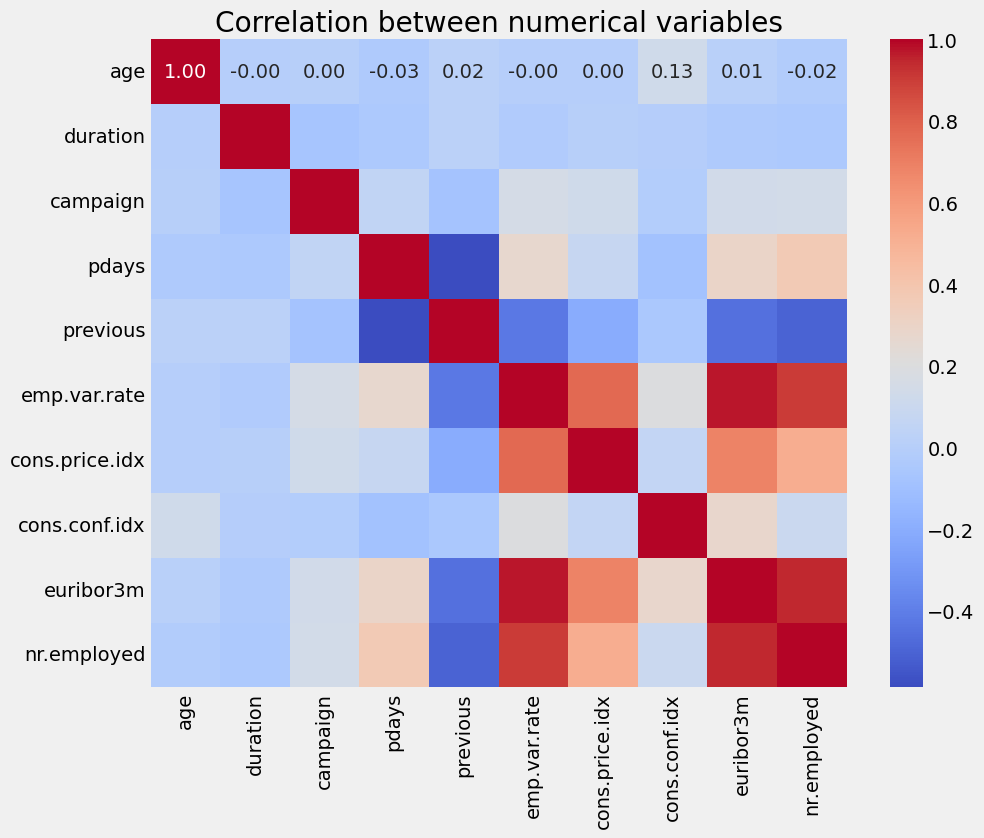

In [12]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Calculate correlation matrix
corr = df[num_cols].corr()

# Show heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between numerical variables")
plt.show()

### Check correlation between categorical variables

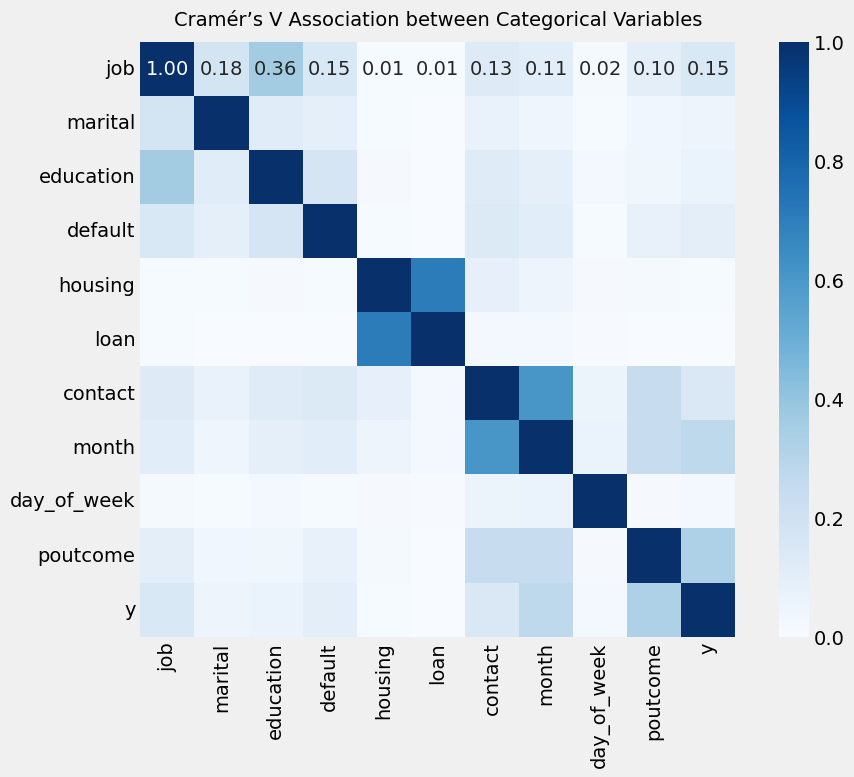

In [13]:
def cramers_v(x, y):
    """Compute Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = df.select_dtypes(include='object').columns

cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

for c1 in cat_cols:
    for c2 in cat_cols:
        if c1 == c2:
            cramers_results.loc[c1, c2] = 1.0
        else:
            cramers_results.loc[c1, c2] = cramers_v(df[c1], df[c2])

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title("Cramér’s V Association between Categorical Variables", fontsize=14, pad=12)
plt.tight_layout()
plt.show()

--------------------
## Descriptive statistics
--------------------

In [14]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [15]:
df.describe(include = 'object').T 

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


### Class balance plot

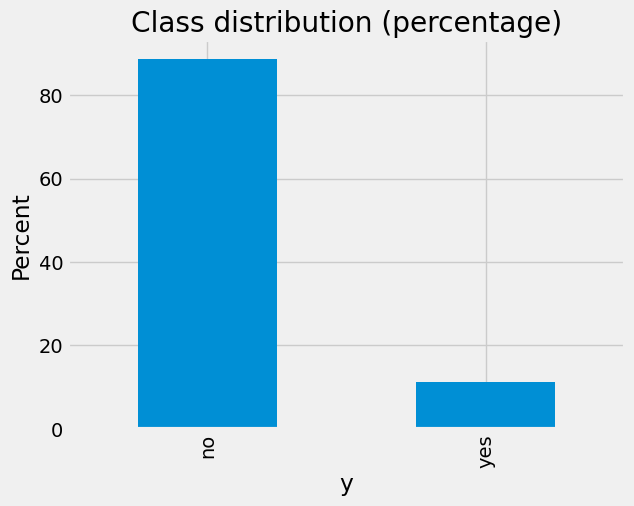

In [16]:
fig = plt.figure()
(df['y'].value_counts(normalize=True).sort_index()*100).plot(kind='bar')
plt.title('Class distribution (percentage)')
plt.ylabel('Percent')
plt.xlabel('y')
plt.show()

-------------------
# Data cleaning, feature selection
-------------------

### Dropping duplicated rows

In [17]:
df.drop_duplicates(inplace=True)
df.size

864696

### Columns dropping based on the set description

The columns **`y`** (target variable) and **`duration`** will be removed from the modeling dataset to avoid data leakage,  
but both will be **saved separately** for later analysis and evaluation at the end of the project.

### Dropping columns with high correlation

In [18]:
#to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
#print("Features muito correlacionadas (remover):", to_drop)
#Features muito correlacionadas (remover): ['euribor3m', 'nr.employed']
#X = X.drop(columns=to_drop) 

#df.drop(columns=['pdays', 'cons.price.idx', 'cons.conf.idx', 'nr.employed'], inplace=True)
df.drop(columns=['pdays', 'nr.employed', 'euribor3m'], inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')

### Handling 'unknown' values

For categorical variables, we treated missing or `'unknown'` values as follows:  
- The variables **`education`** and **`default`** were **kept and modeled**, since the `'unknown'` category may carry useful information for prediction.  
- For **`job`**, **`marital`**, **`housing`**, and **`loan`**, we **dropped the rows** containing `'unknown'` values because their occurrence was very low (less than 3% of the dataset).  
This ensures data consistency while avoiding potential bias due to extremely rare missing categories.

In [19]:
df = df[df['housing'] != 'unknown']
df = df[df['loan'] != 'unknown']
df = df[df['job'] != 'unknown']
df = df[df['marital'] != 'unknown']
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])
df['default'] = df['default'].replace('unknown', df['default'].mode()[0])

cat_cols = df.select_dtypes(include='object').columns
cat_info = pd.DataFrame({
    'Data Type': df[cat_cols].dtypes,
    'Unknown Count': [(df[c] == 'unknown').sum() for c in cat_cols],
    'Unknown (%)': [(df[c].eq('unknown').sum() / len(df)) * 100 for c in cat_cols],
    'Unique Values': [df[c].nunique() for c in cat_cols]
})

cat_info = cat_info.sort_values(by='Unknown Count', ascending=False)
cat_info.style.format({'Unknown (%)': '{:.2f}%'})


,Data Type,Unknown Count,Unknown (%),Unique Values
job,object,0,0.00%,11
marital,object,0,0.00%,3
education,object,0,0.00%,7
default,object,0,0.00%,2
housing,object,0,0.00%,2
loan,object,0,0.00%,2
contact,object,0,0.00%,2
month,object,0,0.00%,10
day_of_week,object,0,0.00%,5
poutcome,object,0,0.00%,3


### Convert months and days to numerical

In [20]:
month_mapping = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}
df["month_ordinal"] = df["month"].map(month_mapping)

### One-hot encoding to months and days

In [21]:

df = pd.get_dummies(df, columns=["month", "day_of_week"], prefix=["month", "day"], drop_first=True)

### Convert target (y) to numerical

In [22]:
df["y"] = df["y"].map({"yes": 1, "no": 0})

### Columns dropping based on the set description

The columns **`y`** (target variable) and **`duration`** will be removed from the modeling dataset to avoid data leakage,  
but both will be **saved separately** for later analysis and evaluation at the end of the project.

In [23]:
y = df['y'].copy()
duration = df['duration'].copy()

X = df.drop(columns=['duration', 'y'])
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'campaign', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'month_ordinal', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_mon', 'day_thu', 'day_tue',
       'day_wed'],
      dtype='object')

### Scale numeric variables

In [25]:
scaler = StandardScaler()
num_cols_scaled = ['age','campaign','previous','emp.var.rate','cons.price.idx',
                   'cons.conf.idx']
X[num_cols_scaled] = scaler.fit_transform(X[num_cols_scaled])

### One-Hot Encoding

In [26]:
cat_cols = ['job','marital','education','default','housing','loan','contact','poutcome']
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

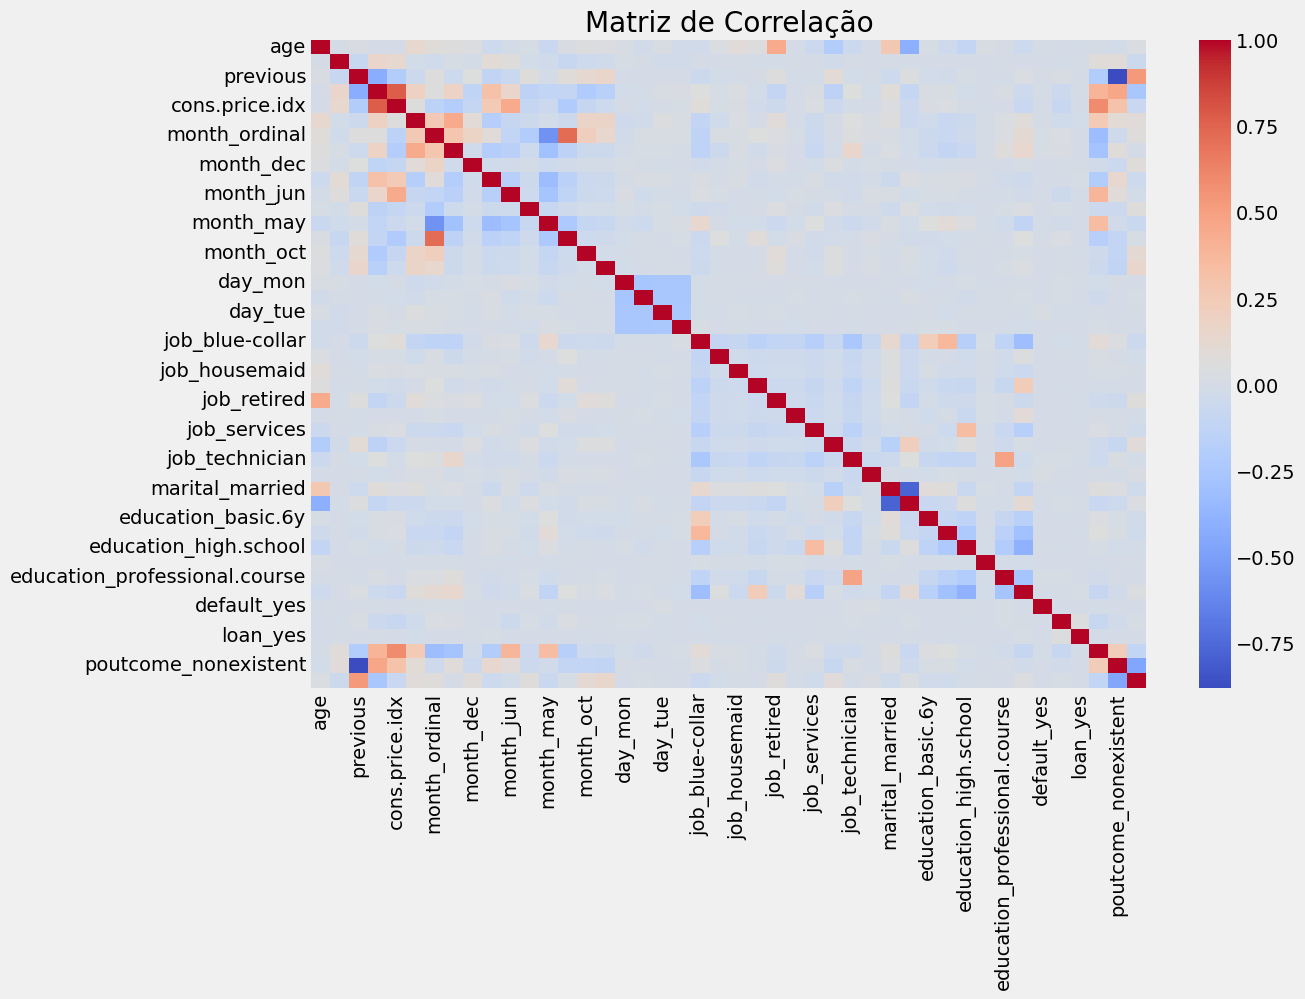

In [27]:
corr = X.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Matriz de Correlação")
plt.show()

### Correlation between Features and Target (y)

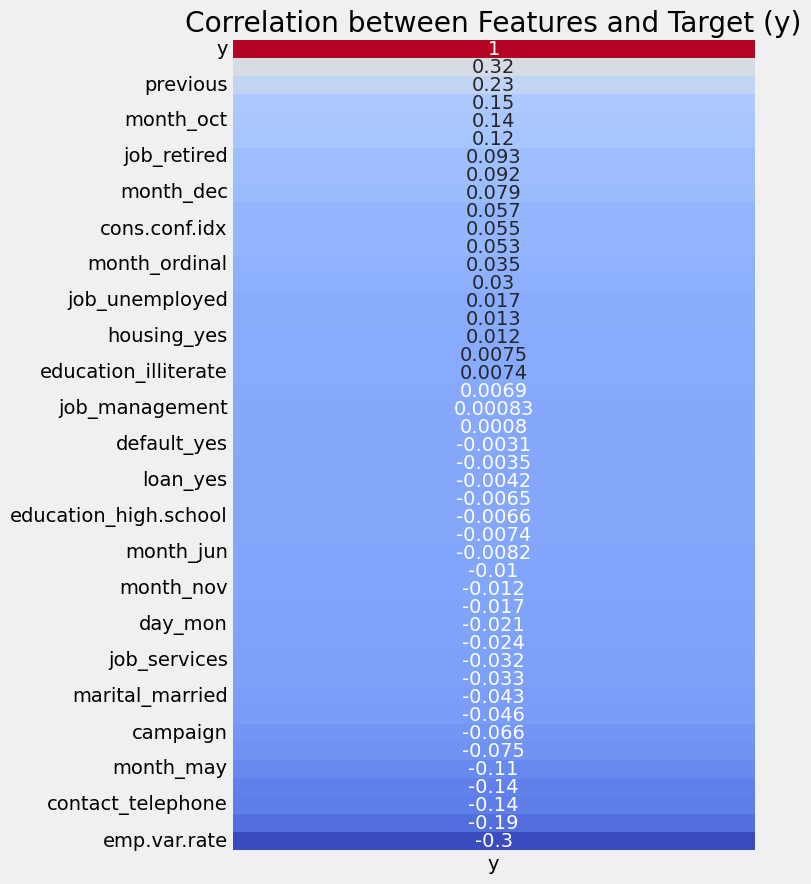

In [28]:
df_temp = X.copy()
df_temp['y'] = y

corr_with_target = df_temp.corr(numeric_only=True)['y'].sort_values(ascending=False)

plt.figure(figsize=(6,10))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation between Features and Target (y)")
plt.show()

### Feature Importance (Random Forest)

Top 15 features (Random Forest):
age                 0.236445
campaign            0.105701
poutcome_success    0.055869
cons.conf.idx       0.047005
emp.var.rate        0.043529
housing_yes         0.043314
cons.price.idx      0.035090
loan_yes            0.028064
previous            0.023807
day_thu             0.022744
marital_married     0.022308
month_ordinal       0.021718
day_tue             0.021018
day_mon             0.020934
day_wed             0.020907
dtype: float64


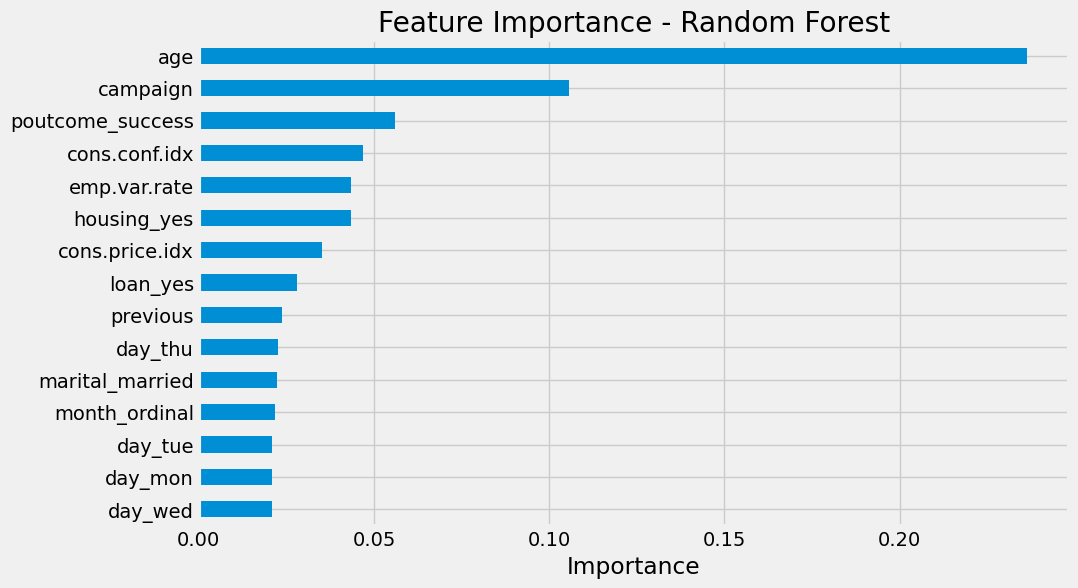

In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("Top 15 features (Random Forest):")
print(importances.head(15))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
importances.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.show()

###

In [33]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
print("Features selected:", X.columns[rfe.support_])

Features selected: Index(['emp.var.rate', 'cons.price.idx', 'month_aug', 'month_dec', 'month_jul',
       'month_mar', 'month_oct', 'month_sep', 'education_illiterate',
       'poutcome_success'],
      dtype='object')


### Train/Test Split and Cross-Validation

Experiment with different train/test splits (e.g., 70/30, 80/20, 90/10) to assess model robustness.
For a more reliable evaluation, use Stratified K-Fold Cross-Validation, which averages results across multiple partitions.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Applying SMOTE to Balance the Training Data

Use the Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples of the minority class, ensuring a balanced training dataset and improving model fairness.

In [35]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nOriginal train shape:", X_train.shape)
print("Resampled train shape:", X_train_res.shape)


Original train shape: (31832, 44)
Resampled train shape: (56486, 44)


### Model Evaluation Function

Evaluate a classifier’s performance using precision, recall, F1-score, AUC, confusion matrix, and ROC curve.
This unified function allows consistent comparison across multiple models.

In [36]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print(classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_proba))
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=model.__class__.__name__)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

### Model Training and Evaluation
Train and evaluate multiple models (Random Forest and Logistic Regression) using the same balanced training data.
Compare metrics such as Precision, Recall, F1, ROC-AUC, and MCC to identify the most effective classifier.


--- RANDOM FOREST ---
ROC-AUC médio (5-fold CV): 0.7664
Desvio padrão: 0.0097

--- LOGISTIC REGRESSION ---
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7062
           1       0.31      0.56      0.40       897

    accuracy                           0.81      7959
   macro avg       0.62      0.70      0.64      7959
weighted avg       0.87      0.81      0.83      7959

AUC: 0.7565422297238633


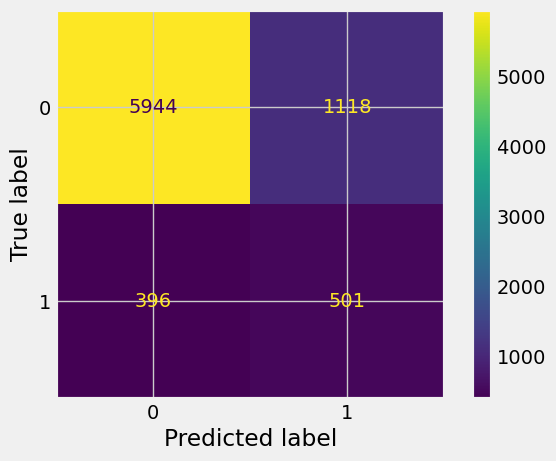

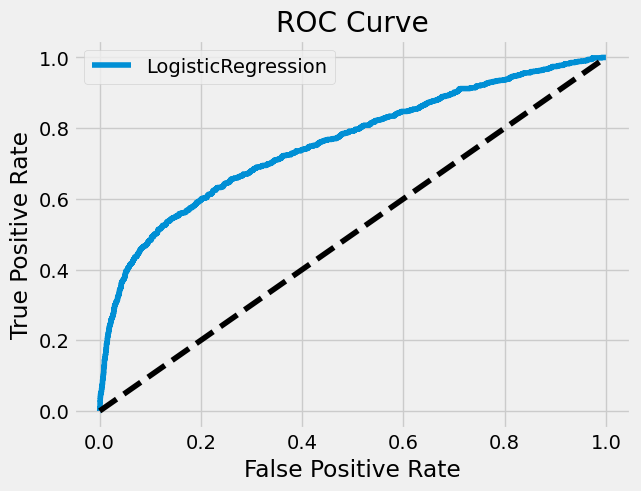

In [41]:
print("\n--- RANDOM FOREST ---")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf_model, X, y, cv=cv, scoring='roc_auc')

print("ROC-AUC médio (5-fold CV):", round(scores.mean(), 4))
print("Desvio padrão:", round(scores.std(), 4))

print("\n--- LOGISTIC REGRESSION ---")
lr_model = LogisticRegression(max_iter=1000)
evaluate_model(lr_model, X_train_res, y_train_res, X_test, y_test)

### Feature Correlation Heatmap

Visualize the correlation matrix of the selected features using a Seaborn heatmap.
Helps identify multicollinearity and confirm the diversity of information among predictors.

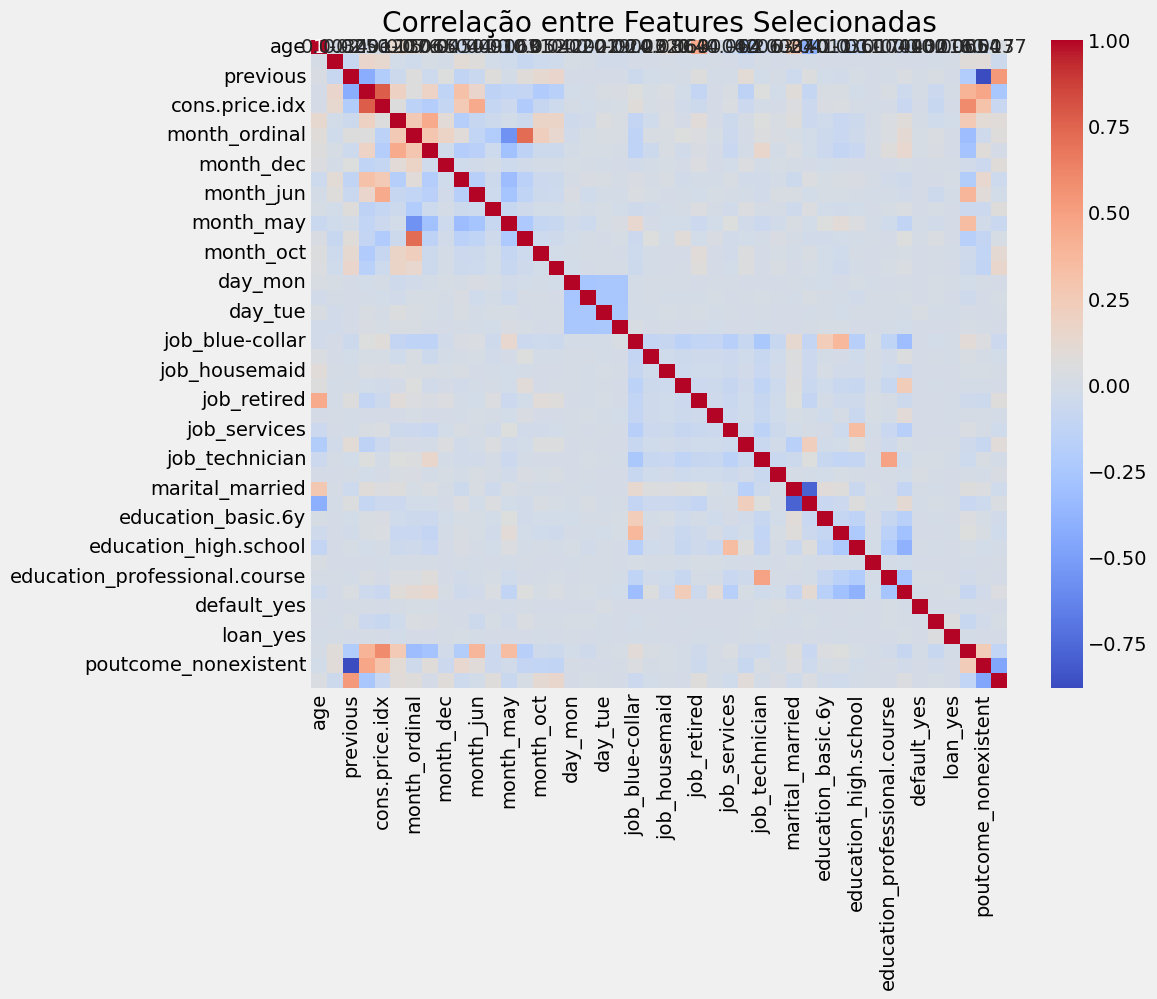

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre Features Selecionadas")
plt.show()

### Random Forest Feature Importance Plot

Display the top 15 most influential features in the Random Forest model using a horizontal bar chart.
This helps visualize which variables have the greatest predictive power.

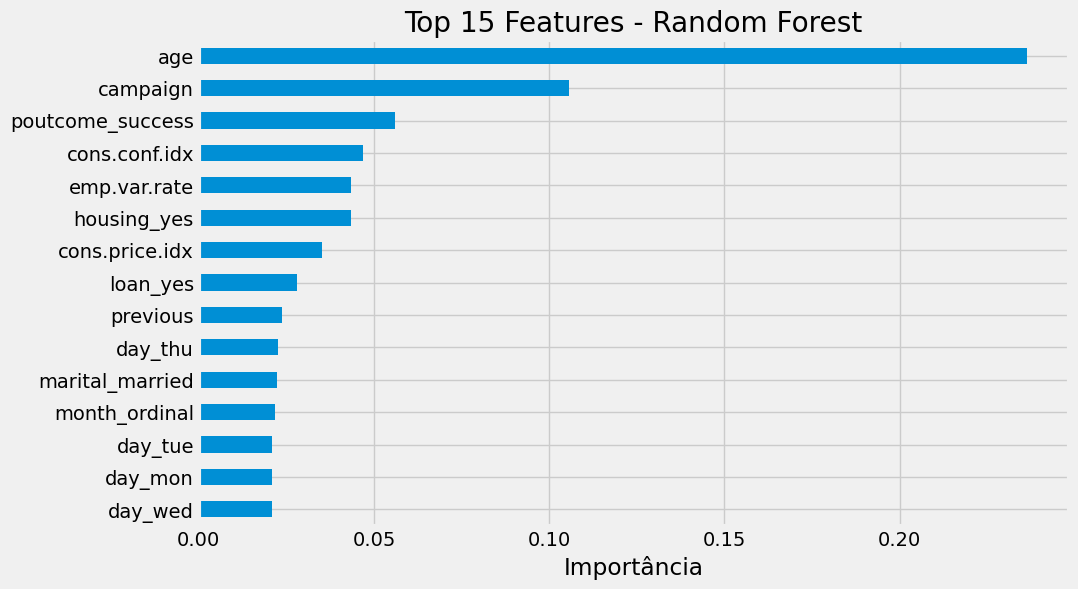

In [43]:
plt.figure(figsize=(10,6))
importances.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Features - Random Forest")
plt.xlabel("Importância")
plt.show()

### Textual Interpretation of Feature Importance

Generate quick textual insights summarizing the top features and their relative importance values in the Random Forest model.

In [44]:
for feature, importance in importances.head(10).items():
    print(f"A feature '{feature}' tem importância {importance:.3f} no modelo Random Forest.")

A feature 'age' tem importância 0.236 no modelo Random Forest.
A feature 'campaign' tem importância 0.106 no modelo Random Forest.
A feature 'poutcome_success' tem importância 0.056 no modelo Random Forest.
A feature 'cons.conf.idx' tem importância 0.047 no modelo Random Forest.
A feature 'emp.var.rate' tem importância 0.044 no modelo Random Forest.
A feature 'housing_yes' tem importância 0.043 no modelo Random Forest.
A feature 'cons.price.idx' tem importância 0.035 no modelo Random Forest.
A feature 'loan_yes' tem importância 0.028 no modelo Random Forest.
A feature 'previous' tem importância 0.024 no modelo Random Forest.
A feature 'day_thu' tem importância 0.023 no modelo Random Forest.


In [ ]:
""" # Identify categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

# 1. Ordinal variables (with natural order)
ordinal_features = []
ordinal_mappings = []

if 'education' in cat_cols:
    ordinal_features.append('education')
    ordinal_mappings.append([
        'illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
        'high.school', 'professional.course', 'university.degree', 'unknown'
    ])

if 'month' in cat_cols:
    ordinal_features.append('month')
    ordinal_mappings.append([
        'jan', 'feb', 'mar', 'apr', 'may', 'jun',
        'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
    ])

# 2. Nominal variables (no natural order)
nominal_features = [c for c in cat_cols if c not in ordinal_features]

# 3. Define preprocessing pipelines
numeric_preprocess = Pipeline(steps=[
    ('scaler', StandardScaler())
])

ordinal_preprocess = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories=ordinal_mappings))
])

nominal_preprocess = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 4. Combine everything in a single ColumnTransformer
preprocess = ColumnTransformer(transformers=[
    ('num', numeric_preprocess, num_cols),
    ('ord', ordinal_preprocess, ordinal_features),
    ('nom', nominal_preprocess, nominal_features)
])

# Optional: test fit
preprocess.fit(df)

print("✅ Preprocessing pipeline ready.")
print(f"Numeric: {len(num_cols)} | Ordinal: {len(ordinal_features)} | Nominal: {len(nominal_features)}")
 """